In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
font_path = './font.ttf'  # 請替換成您自己的中文字型路徑
font = fm.FontProperties(fname=font_path)
qa10 = pd.read_csv("./QA_TGDS_JOB_23_10.csv")
print(qa10.shape)
# 不重複的使用人數：412001人(10月)，平均一個用戶一個月用四次，好多喔
# [676096 rows x 1 columns] for 4 months

(1881975, 19)


In [33]:
# !pip install geopy
# 這樣是直線距離
from geopy.distance import geodesic
import time
qa10['Distance_km'] = None
start = time.time()
for i in range(len(qa10)):
    coords_1 = (qa10.iloc[i]['On_Lat_Y'], qa10.iloc[i]['On_Lng_X'])
    coords_2 = (qa10.iloc[i]['Off_Lat_Y'], qa10.iloc[i]['Off_Lng_X'])
    distance = geodesic(coords_1, coords_2).kilometers
    qa10.at[i, 'Distance_km'] = distance
    if i%5000 == 0:
        print(f"第 {i+1} 列的距離為 {distance:.2f} 公里。")
end = time.time()
print(f"時間花費 {(end-start):.2f} 秒。") #take about 15 mins to complete.

第 201 列的距離為 0.62 公里。
第 5201 列的距離為 0.70 公里。
第 10201 列的距離為 8.32 公里。
第 15201 列的距離為 1.59 公里。
第 20201 列的距離為 4.84 公里。
第 25201 列的距離為 0.02 公里。
第 30201 列的距離為 5.79 公里。
第 35201 列的距離為 7.88 公里。
第 40201 列的距離為 5.14 公里。
第 45201 列的距離為 5.63 公里。
第 50201 列的距離為 2.39 公里。
第 55201 列的距離為 0.51 公里。
第 60201 列的距離為 7.71 公里。
第 65201 列的距離為 2.10 公里。
第 70201 列的距離為 5.54 公里。
第 75201 列的距離為 1.62 公里。
第 80201 列的距離為 3.09 公里。
第 85201 列的距離為 1.47 公里。
第 90201 列的距離為 1.76 公里。
第 95201 列的距離為 5.77 公里。
第 100201 列的距離為 4.02 公里。
第 105201 列的距離為 0.90 公里。
第 110201 列的距離為 23.03 公里。
第 115201 列的距離為 4.66 公里。
第 120201 列的距離為 2.14 公里。
第 125201 列的距離為 16.65 公里。
第 130201 列的距離為 7.37 公里。
第 135201 列的距離為 2.98 公里。
第 140201 列的距離為 6.11 公里。
第 145201 列的距離為 4.76 公里。


KeyboardInterrupt: 

In [44]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
# 這邊我們放入經緯度使用 .reverse
for i in range(10):
    xy = str(qa10.iloc[i]['Off_Lat_Y'])+ ", "+str(qa10.iloc[i]['Off_Lng_X'])
    print(xy)
    location = geolocator.geocode(xy)
    print(location.address) #location 的地址
    print(location.raw) # location 的完整地理編碼的結果

# location = geolocator.geocode("台北101")
# print(location.address) #location 的地址
# print((location.latitude, location.longitude)) # location 的緯度與經度
# print(location.raw) # location 的完整地理編碼的結果


25.038412, 121.552914
64號, 忠孝東路四段216巷, 車層里, 大安區, 車罾, 臺北市, 106, 臺灣
{'place_id': 202134892, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', 'osm_id': 10830297503, 'lat': '25.0383556', 'lon': '121.5528643', 'class': 'place', 'type': 'house', 'place_rank': 30, 'importance': 9.99999999995449e-06, 'addresstype': 'place', 'name': '', 'display_name': '64號, 忠孝東路四段216巷, 車層里, 大安區, 車罾, 臺北市, 106, 臺灣', 'boundingbox': ['25.0383056', '25.0384056', '121.5528143', '121.5529143']}
24.83667, 121.233874
374號, 民族路, 清水坑, 三林里, 龍潭區, 桃園市, 32546, 臺灣
{'place_id': 199522813, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', 'osm_id': 11190240467, 'lat': '24.8367176', 'lon': '121.2338452', 'class': 'place', 'type': 'house', 'place_rank': 30, 'importance': 9.99999999995449e-06, 'addresstype': 'place', 'name': '', 'display_name': '374號, 民族路, 清水坑, 三林里, 龍潭區, 桃園市, 32546, 臺灣', 'boundingbox': ['24.8366676', '24.83

In [46]:
# 測試geo資料及
# https://medium.com/@fearless_fusion_snake_755/%E7%8E%A9%E7%8E%A9%E7%9C%8B%E5%9C%B0%E7%90%86%E7%A9%BA%E9%96%93%E8%B3%87%E6%96%99-3-%E5%9C%B0%E7%90%86%E7%A9%BA%E9%96%93%E8%B3%87%E6%96%99%E9%80%A3%E6%8E%A5%E8%88%87%E5%88%86%E7%B5%84%E6%93%8D%E4%BD%9C-7efa4a802b7c
qa10s = qa10.head(50)
qa10s = qa10s.loc[~np.isnan(qa10s["Off_Lat_Y"])]
qa10s = gpd.GeoDataFrame(
    qa10s, geometry=gpd.points_from_xy(qa10s.Off_Lng_X, qa10s.Off_Lat_Y))
qa10s.crs = "EPSG:4326"    
qa10s = qa10s.to_crs(epsg=4326)
qa10s.head()


NameError: name 'gpd' is not defined

In [30]:
qa10.head()

,JobID,SN,CustPhone,sex,JobTime,svcTime,EndTime,On_City_GIS,On_Dist_GIS,On_Road,Off_City_GIS,Off_Dist_GIS,On_Lng_X,On_Lat_Y,Off_Lng_X,Off_Lat_Y,APP_Member_Level,paytype,AgentDriver,Distance_km
0,DAP2310090A636,1,08E5225390117ADAADC66A4A398EDBB6F510AEA7,女生,2023-10-09 13:27:48 UTC,2023-10-09 13:30:51,2023-10-09 13:58:51,新北市,深坑區,文化街,臺北市,大安區,121.619277,25.000112,121.552914,25.038412,2.銀熊,敬老愛心卡,False,0.58714
1,DAP2310090M960,1,F2D2FE956443AD4CFD28D92587D2873CCCC8952F,男生,2023-10-09 19:07:01 UTC,2023-10-09 19:13:03,2023-10-09 19:22:03,桃園市,龍潭區,中正路,桃園市,龍潭區,121.216663,24.866326,121.233874,24.836670,0.小熊,現金,False,0.58714
2,DAP2310090L299,1,B27BD63B948BA3CD7F17586CE4726D1EA940F0EB,未知,2023-10-09 18:40:42 UTC,2023-10-09 18:47:39,2023-10-09 19:11:20,新竹縣,湖口鄉,中華路,新竹縣,竹北市,121.007457,24.868518,121.038155,24.808074,3.金熊,現金,False,0.58714
3,DIP2310091F865,1,5D3621C692C3A2C56DD518C9EB60A0AE9C7C9C68,男生,2023-10-09 17:44:42 UTC,2023-10-09 17:54:11,2023-10-09 18:41:07,桃園市,大溪區,介壽路,新竹縣,竹東鎮,121.283089,24.900963,121.091170,24.722350,1.黑熊,現金,False,0.58714
4,DIP2310090I655,1,5C984280F79513D8C73DE3BE992A9D6CBBF260C0,女生,2023-10-09 10:32:26 UTC,2023-10-09 10:36:16,2023-10-09 10:58:19,新北市,鶯歌區,永和街,桃園市,桃園區,121.333468,24.969054,121.314820,25.021099,1.黑熊,現金,False,0.58714


In [4]:
qa11 = pd.read_csv("./QA_TGDS_JOB_23_11.csv")
qa12 = pd.read_csv("./QA_TGDS_JOB_23_12.csv")
qa01 = pd.read_csv("./QA_TGDS_JOB_24_01.csv")
print(qa11.shape)
print(qa12.shape)
print(qa01.shape)
# (1858257, 19)
# (1934120, 19)
# (1849326, 19)

(1858257, 19)
(1934120, 19)
(1849326, 19)


In [8]:
combined_df = pd.concat([qa10, qa11, qa12, qa01])

In [5]:
qa10['APP_Member_Level'] = qa10['APP_Member_Level'].replace({
    '3.金熊': 3,
    '1.黑熊': 1,
    '2.銀熊': 2,
    '4.鑽石熊': 4,
    '0.小熊': 0
})

qa10['sex'] = qa10['sex'].replace({
    '男生': 0,
    '女生': 1,
    '未知': 2,
})

qa10['AgentDriver'] = qa10['AgentDriver'].replace({
    False: 0,
    True: 1,
})

qa10['JobTime'] = pd.to_datetime(qa10['JobTime'], format='%Y-%m-%d %H:%M:%S %Z')
qa10['svcTime'] = pd.to_datetime(qa10['svcTime'], format='%Y-%m-%d %H:%M:%S')
qa10['EndTime'] = pd.to_datetime(qa10['EndTime'], format='%Y-%m-%d %H:%M:%S')

SyntaxError: expected ':' (4045097335.py, line 1)

In [4]:
level = qa10['APP_Member_Level'].value_counts()
level = level.reindex([0, 1, 2, 3, 4])
level

APP_Member_Level
0     69170
1    401360
2    365446
3    877395
4    167959
Name: count, dtype: int64

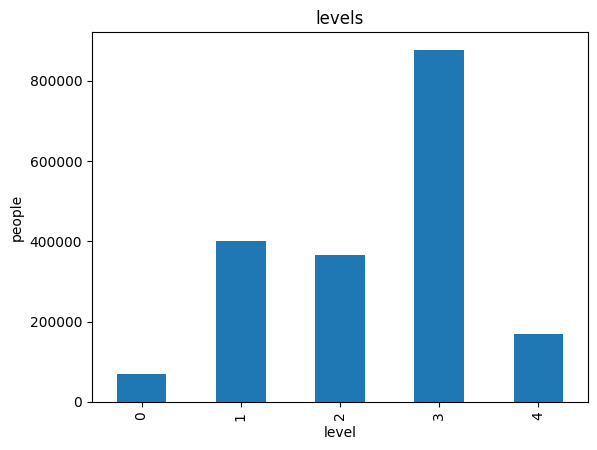

In [5]:
# 繪製長條圖
level.plot(kind='bar')
plt.title('levels')
plt.xlabel('level')
plt.ylabel('people')
plt.show()

In [6]:
# qa10['paytype'] = qa10['paytype'].replace(['綁定-綁定信用卡', '綁定-LINEPAY', '綁定-永豐聯名卡'], '綁定')
paytype = qa10['paytype'].value_counts()
paytype

paytype
現金             796384
綁定-綁定信用卡       427612
企業簽單           166644
綁定-LINEPAY     165331
綁定-永豐聯名卡        75751
敬老愛心卡           71233
T Points        53098
悠遊卡             26465
搭車金             18575
實體信用卡           13741
LINE Pay        11788
街口              11423
HappyGo          9948
Pi行動錢包           9339
ApplePay         8813
台北好孕券            4688
綁定-悠遊付           4657
新北好孕券            3827
中信紅利折抵           1018
綁定-銀聯             601
台灣pay             513
PXPay             107
銀聯                 65
愛金卡                64
歐付寶                62
全盈+PAY             52
橘子支付               45
玉山wallet           36
支付寶                25
WeChat             22
台新-卡得利             19
PGTalk             19
ApplePay_銀聯        10
Name: count, dtype: int64

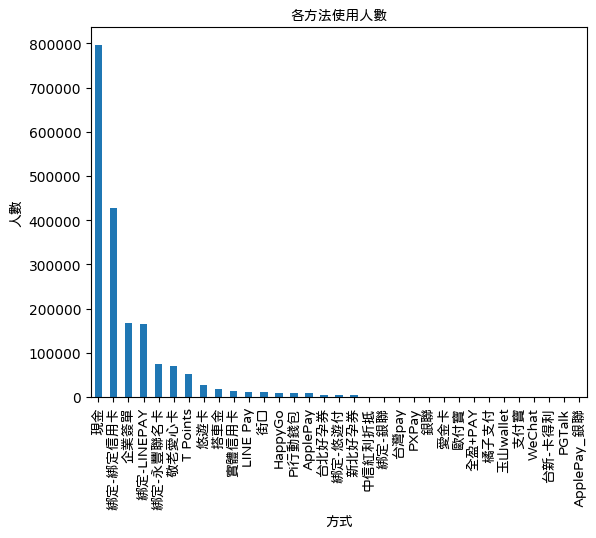

In [7]:
paytype.plot(kind='bar')
plt.title('各方法使用人數', fontproperties=font)
plt.xlabel('方式', fontproperties=font)
plt.ylabel('人數', fontproperties=font)
plt.xticks(range(len(paytype.index)), paytype.index, fontproperties=font)
plt.show()

In [9]:
phone_counts = combined_df.groupby('CustPhone').size()
phone_counts_df = pd.DataFrame(phone_counts, columns=['PhoneCount'])
phone_counts_df = phone_counts_df.sort_values(by='PhoneCount', ascending=False)
print(phone_counts_df)

                                          PhoneCount
CustPhone                                           
7CD844171A7FC97B14DD74E161F01EFC0384A6E2        1890
8BEAC77E7710DDA077E0B0BC9E16DA4072560E3F        1357
95D8DC6EE80359ED4FF28BE466568FB6841189F7        1022
6DED6BD38D02FB30BFDF83A26F45D3403D2C747D         876
58BB3B11CD8F3CF17583B7D09E44BFA187256A6D         792
...                                              ...
A24D31389AD4CABF1B0FC79DD86B74100FCDFB62           1
6D8E1703EC015B39A9D6BE03E99A8465C3F3F0D1           1
1B9E98DECB0811446CEE5D31169E4F229F118F7F           1
A24C4CE9D6A9305540B48476DAE7CE90C186966D           1
DC287AB8FEE2B47732C23A7C4ABDCC8540E36616           1

[676096 rows x 1 columns]


In [13]:
driver_count = qa10['AgentDriver'].value_counts().get(1, 0)
total_count = len(qa10)
percentage = (driver_count / total_count) * 100
print(f'Percentage：{percentage:.2f}%')

Percentage：0.48%


In [18]:
service = pd.read_csv("./services.csv")
washing_money = pd.read_csv("./washing_money.csv")
tw_life = pd.read_csv("./tw_life.csv")

In [21]:
# 找出兩張表中重複的手機號碼數量
intersection_count = len(set(combined_df['CustPhone']).intersection(service['客戶手機號碼']))

# 找出出現在A表但沒有出現在B表的手機號碼數量
left_only_count = len(set(combined_df['CustPhone']) - set(service['客戶手機號碼']))

# 找出出現在B表但沒有出現在A表的手機號碼數量
right_only_count = len(set(service['客戶手機號碼']) - set(combined_df['CustPhone']))

print(f"重複的手機號碼數量：{intersection_count}")
print(f"出現在乘車表但沒有出現在大洗衣的手機號碼數量：{left_only_count}")
print(f"出現在大洗衣但沒有出現在乘車表的手機號碼數量：{right_only_count}")

重複的手機號碼數量：3524
出現在乘車表但沒有出現在大洗衣的手機號碼數量：672572
出現在大洗衣但沒有出現在乘車表的手機號碼數量：16039


In [22]:
# 找出兩張表中重複的手機號碼數量
intersection_count = len(set(combined_df['CustPhone']).intersection(washing_money['客戶手機號碼']))

# 找出出現在A表但沒有出現在B表的手機號碼數量
left_only_count = len(set(combined_df['CustPhone']) - set(washing_money['客戶手機號碼']))

# 找出出現在B表但沒有出現在A表的手機號碼數量
right_only_count = len(set(washing_money['客戶手機號碼']) - set(combined_df['CustPhone']))

print(f"重複的手機號碼數量：{intersection_count}")
print(f"出現在乘車表但沒有出現在大洗衣2的手機號碼數量：{left_only_count}")
print(f"出現在大洗衣2但沒有出現在乘車表的手機號碼數量：{right_only_count}")

重複的手機號碼數量：3542
出現在乘車表但沒有出現在大洗衣2的手機號碼數量：672554
出現在大洗衣2但沒有出現在乘車表的手機號碼數量：16140


In [23]:
# 找出兩張表中重複的手機號碼數量
intersection_count = len(set(combined_df['CustPhone']).intersection(tw_life['客戶手機號碼']))

# 找出出現在A表但沒有出現在B表的手機號碼數量
left_only_count = len(set(combined_df['CustPhone']) - set(tw_life['客戶手機號碼']))

# 找出出現在B表但沒有出現在A表的手機號碼數量
right_only_count = len(set(tw_life['客戶手機號碼']) - set(combined_df['CustPhone']))

print(f"重複的手機號碼數量：{intersection_count}")
print(f"出現在乘車表但沒有出現在大管家的手機號碼數量：{left_only_count}")
print(f"出現在大管家但沒有出現在乘車表的手機號碼數量：{right_only_count}")

重複的手機號碼數量：2663
出現在乘車表但沒有出現在大管家的手機號碼數量：673433
出現在大管家但沒有出現在乘車表的手機號碼數量：3735
